# Импорт библиотек

In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Загрузка данных

In [2]:
car_df = pd.read_csv('data/cars_moldova.csv', delimiter=',')

In [3]:
car_df.sample(5)

Make      Model  Year      Style  Distance  Engine_capacity(cm3)  \
39964     Dacia      Logan  2012      Sedan   10000.0                1200.0   
35641  Mercedes  CLS Class  2006      Sedan     218.0                3000.0   
21567      Ford     Fusion  2019      Sedan   50000.0                2000.0   
16836  Mercedes       Vito  1998    Minivan  240000.0                2300.0   
24527      Ford      Focus  2008  Universal       0.0                1400.0   

          Fuel_type Transmission  Price(euro)  
39964  Metan/Propan       Manual       2750.0  
35641        Diesel    Automatic       3000.0  
21567        Hybrid    Automatic      15199.0  
16836        Diesel       Manual       2750.0  
24527        Petrol       Manual       3000.0

# Очистка и первоначальная работа с данными

### Удаление дубликатов

In [4]:
car_df.drop_duplicates()

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2      Volkswagen          Golf  1998  Hatchback       1.0   
3         Renault        Laguna  2012  Universal  110000.0   
4            Opel         Astra  2006  Universal  200000.0   
...           ...           ...   ...        ...       ...   
41001  Land Rover    Freelander  2002  Crossover  225000.0   
41002       Dacia     Logan Mcv  2015  Universal   89000.0   
41003     Renault         Modus  2009  Hatchback     225.0   
41005       Mazda             6  2006      Combi  370000.0   
41006     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1400.0        Petrol       Manual       2200.0  
3                    1500.0        Diesel       Manual       6550.0  
4                    1600.0  Metan/Propan       Manual       4100.0  
...                     ...           ...          ...          ...  
41001                1800.0  Metan/Propan       Manual       4400.0  
41002                1500.0        Diesel       Manual       7000.0  
41003                1500.0        Diesel       Manual       4500.0  
41005                2000.0        Diesel       Manual       4000.0  
41006                1500.0        Diesel       Manual       4000.0  

[37264 rows x 9 columns]

### Переименование столбцов

In [5]:
car_df = car_df.rename(columns = {
    'Engine_capacity(cm3)': 'Engine_capacity',
    'Price(euro)': 'Price',
})

### Добавление новых столбцов

In [6]:
current_year = datetime.now().year

car_df['Age'] = current_year - car_df['Year']
car_df['Km_year'] = car_df['Distance'] / car_df['Age']

In [7]:
question_dist = car_df[(car_df['Year'] < 2021) & (car_df['Distance'] < 1100)]
car_df = car_df.drop(question_dist.index)

question_dist = car_df[(car_df['Distance'] > 1e6)]
car_df = car_df.drop(question_dist.index)

question_engine = car_df[car_df["Engine_capacity"] < 200]
car_df = car_df.drop(question_engine.index)

question_engine = car_df[car_df["Engine_capacity"] > 5000]
car_df = car_df.drop(question_engine.index)

question_price = car_df[(car_df["Price"] < 101)]
car_df = car_df.drop(question_price.index)

question_price = car_df[car_df["Price"] > 1e5]
car_df = car_df.drop(question_price.index)

question_year = car_df[car_df['Year'] < 1971]
car_df = car_df.drop(question_year.index)

question_km_year = car_df[car_df['Km_year'] > 50e3]
car_df = car_df.drop(question_km_year.index)

question_km_year = car_df[car_df['Km_year'] < 100]
car_df = car_df.drop(question_km_year.index)

car_df = car_df.reset_index(drop=True)

In [8]:
car_df.head(5)

Make         Model  Year      Style  Distance  Engine_capacity  \
0    Toyota         Prius  2011  Hatchback  195000.0           1800.0   
1   Renault  Grand Scenic  2014  Universal  135000.0           1500.0   
2   Renault        Laguna  2012  Universal  110000.0           1500.0   
3      Opel         Astra  2006  Universal  200000.0           1600.0   
4  Mercedes          Vito  2000   Microvan  300000.0           2200.0   

      Fuel_type Transmission   Price  Age       Km_year  
0        Hybrid    Automatic  7750.0   11  17727.272727  
1        Diesel       Manual  8550.0    8  16875.000000  
2        Diesel       Manual  6550.0   10  11000.000000  
3  Metan/Propan       Manual  4100.0   16  12500.000000  
4        Diesel       Manual  3490.0   22  13636.363636

# Визуализация данных

### Основные статистики

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             35517 non-null  object 
 1   Model            35517 non-null  object 
 2   Year             35517 non-null  int64  
 3   Style            35517 non-null  object 
 4   Distance         35517 non-null  float64
 5   Engine_capacity  35517 non-null  float64
 6   Fuel_type        35517 non-null  object 
 7   Transmission     35517 non-null  object 
 8   Price            35517 non-null  float64
 9   Age              35517 non-null  int64  
 10  Km_year          35517 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.0+ MB


In [10]:
car_df.describe().transpose().style.background_gradient()

### Выделим числовые и категориальные столбцы

In [11]:
def split_column_by_types(df):
    category_columns = []
    number_columns = []

    for column in df.columns:
        if df[column].dtypes == object or df[column].dtypes == 'category':
            category_columns += [column]
        else:
            number_columns += [column]
    
    return category_columns, number_columns

In [12]:
category_columns, number_columns = split_column_by_types(car_df)

print(category_columns)
print(number_columns)

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
['Year', 'Distance', 'Engine_capacity', 'Price', 'Age', 'Km_year']


### Строим гистограммы распределения числовых признаков

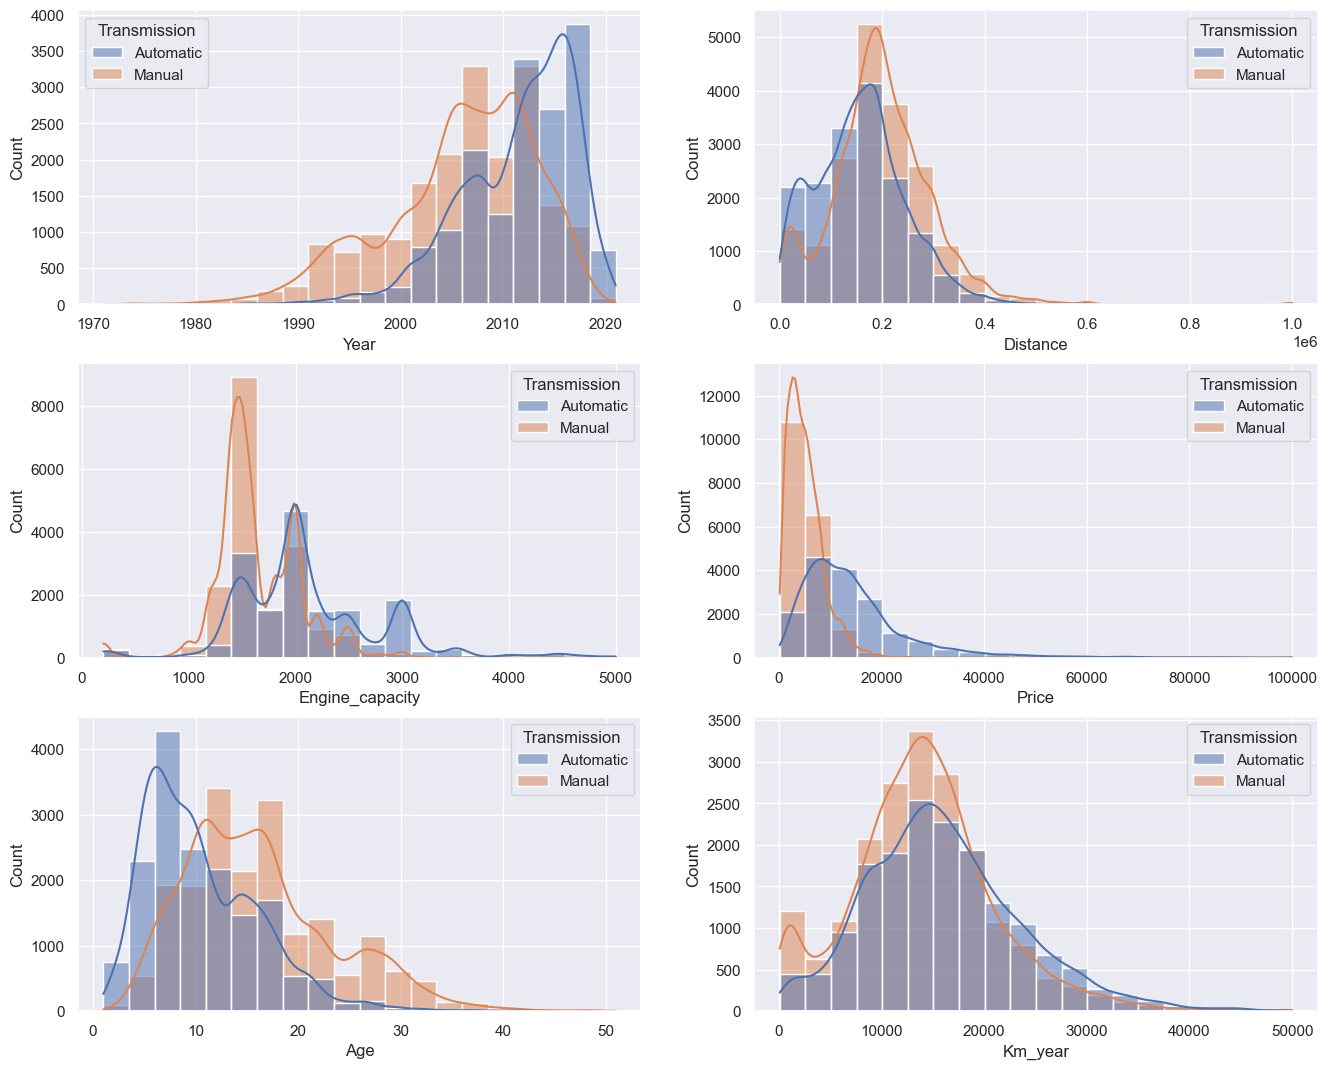

In [13]:
width = 2
height = int(np.ceil(len(number_columns) / width))

fig, axes = plt.subplots(nrows=height, ncols=width, figsize=(16, 13))

for idx, column in enumerate(number_columns):
    plt.subplot(height, width, idx + 1)

    # plt.xlabel(f'Поле: {column}')
    # plt.ylabel('Количество')

    sns.histplot(
        data=car_df,
        x=column,
        bins=20,
        kde=True,
        hue='Transmission'
    )

### Строим графики попарной зависимости признаков

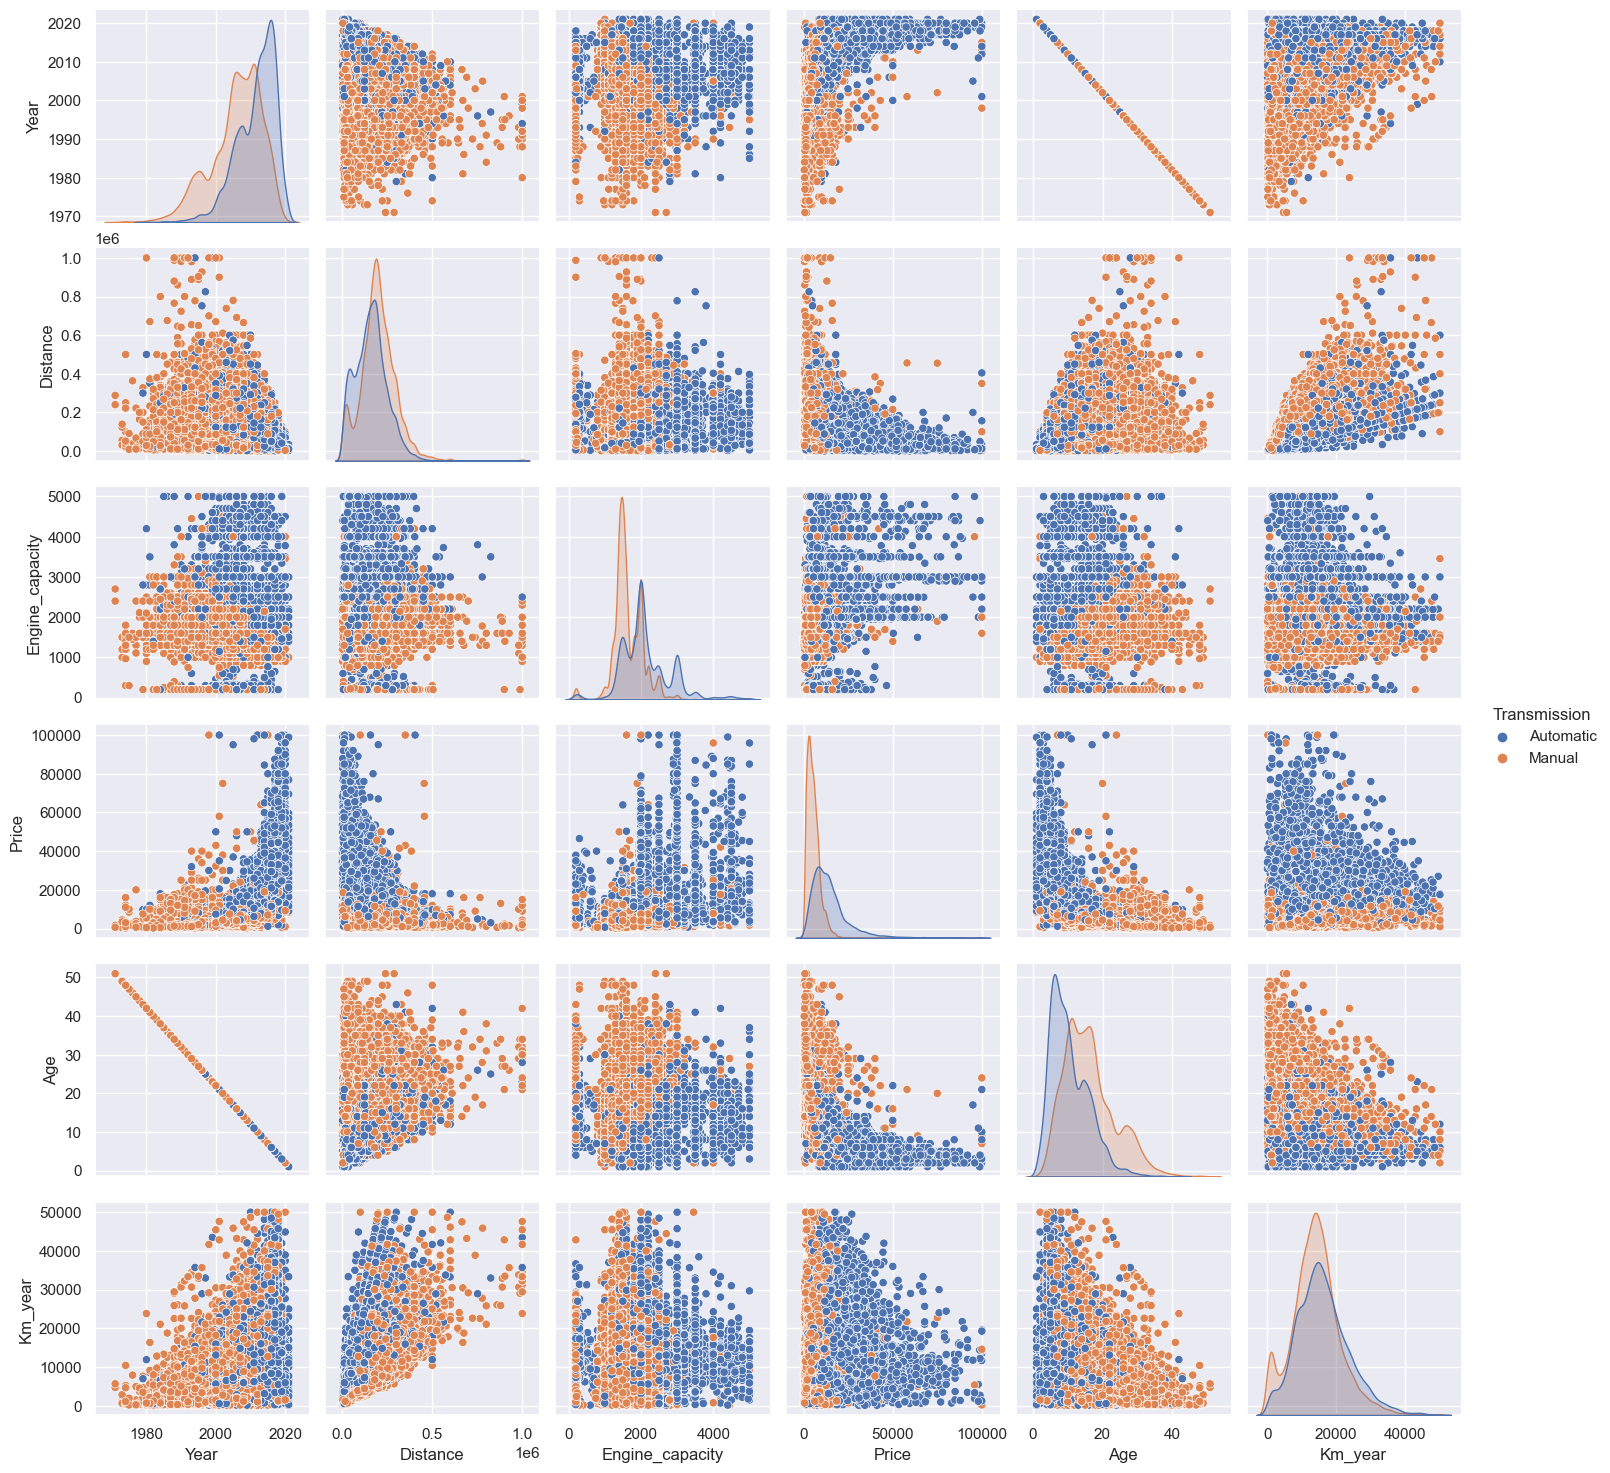

In [14]:
sns.pairplot(
    data=car_df,
    hue='Transmission'
)

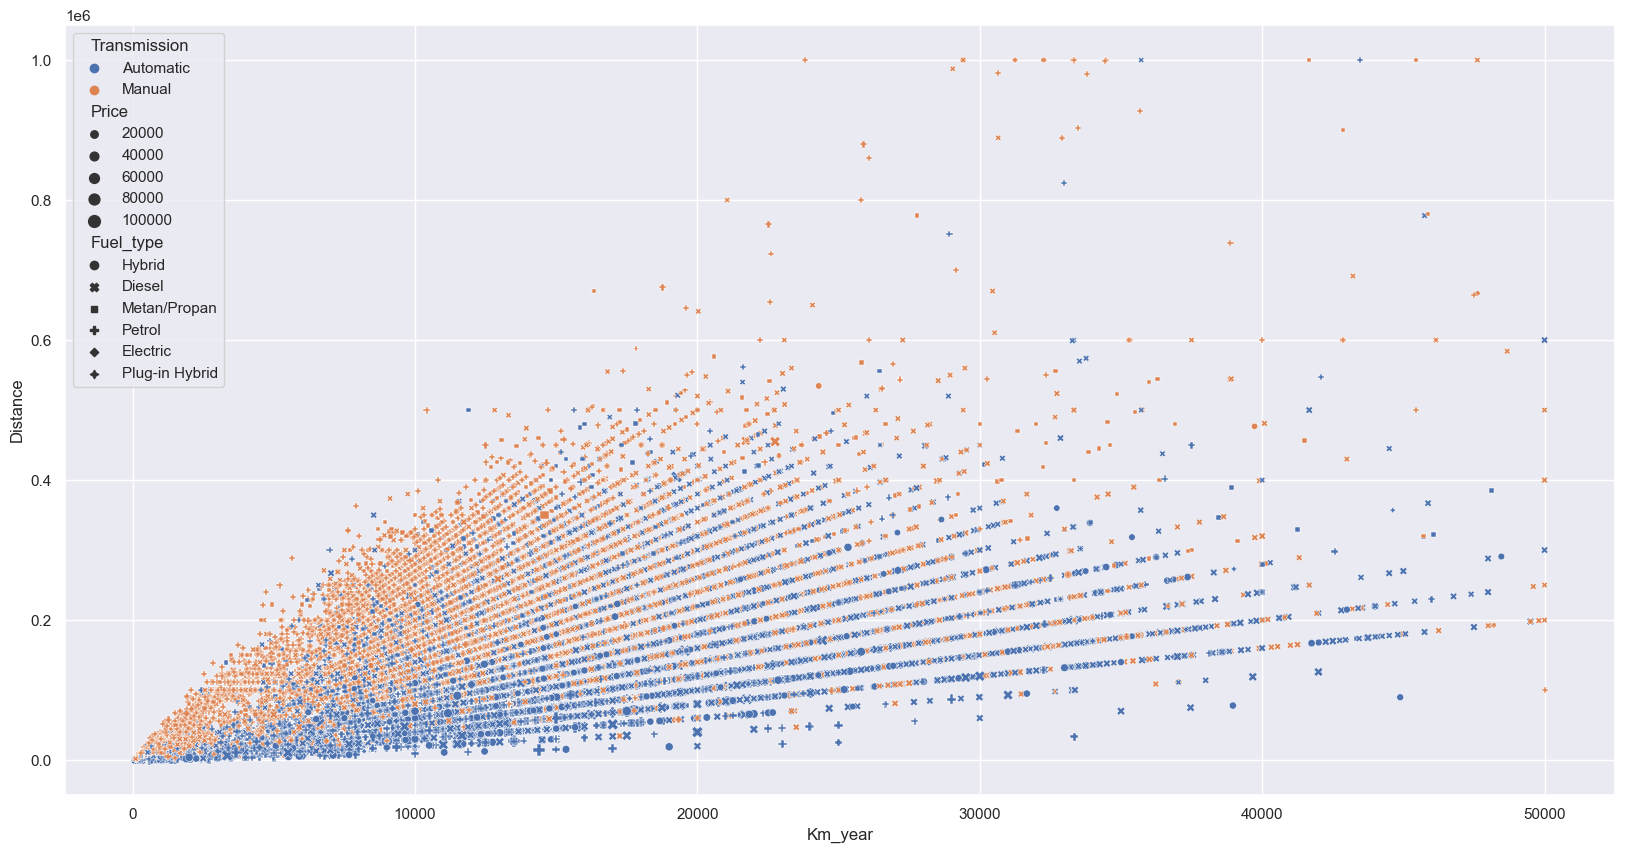

In [15]:
plt.figure(figsize=(20, 10))

sns.scatterplot(
    data=car_df,
    x='Km_year',
    y='Distance',
    hue='Transmission',
    style='Fuel_type',
    size = 'Price'
);

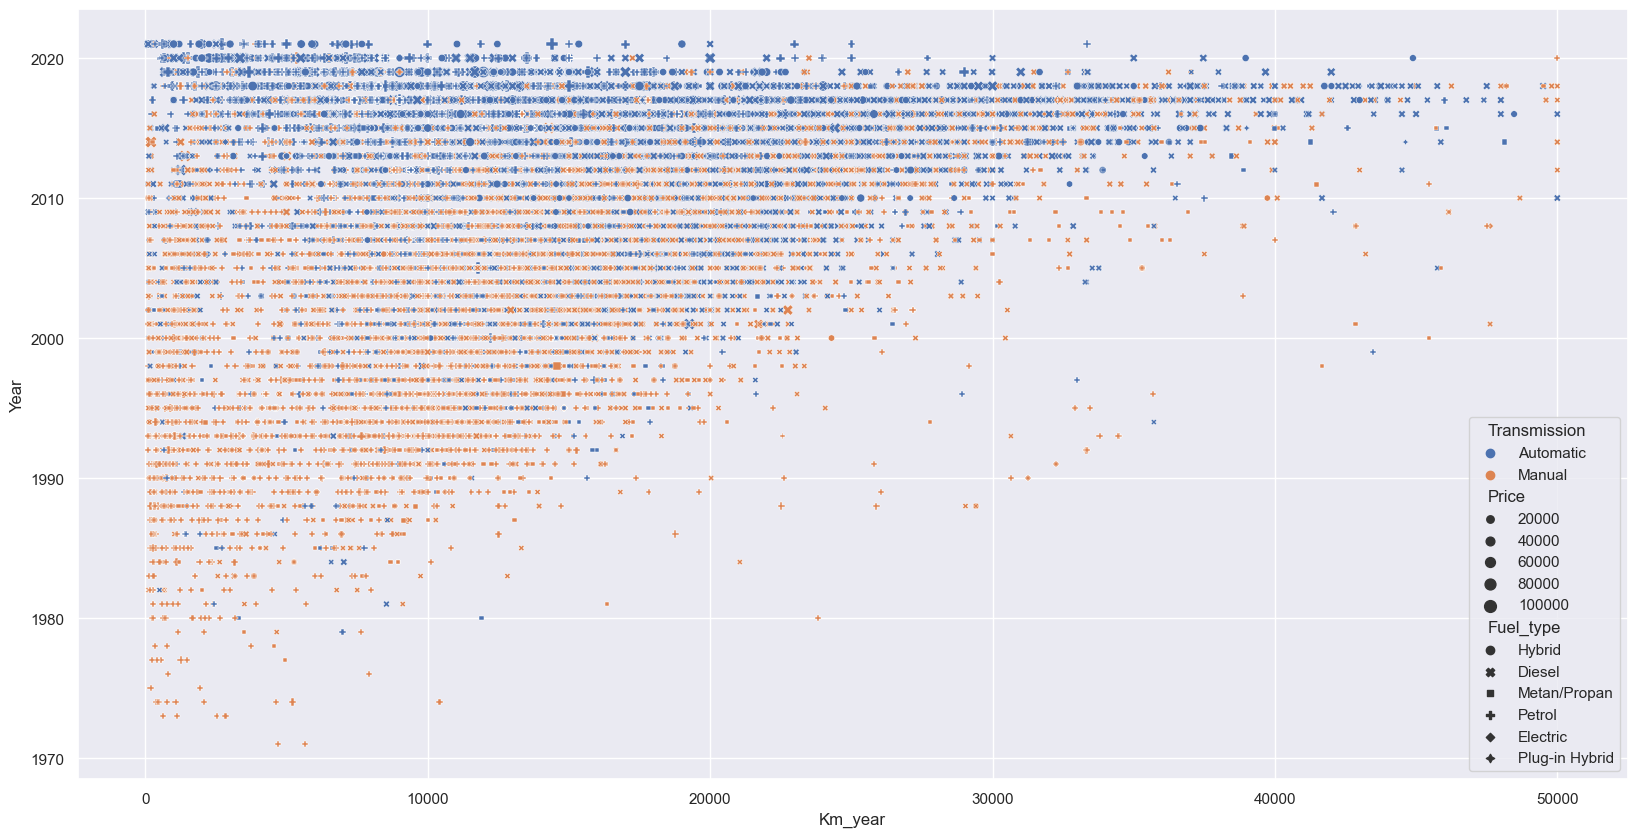

In [16]:
plt.figure(figsize=(20, 10))

sns.scatterplot(
    data=car_df,
    x='Km_year',
    y='Year',
    hue='Transmission',
    style='Fuel_type',
    size = 'Price'
);

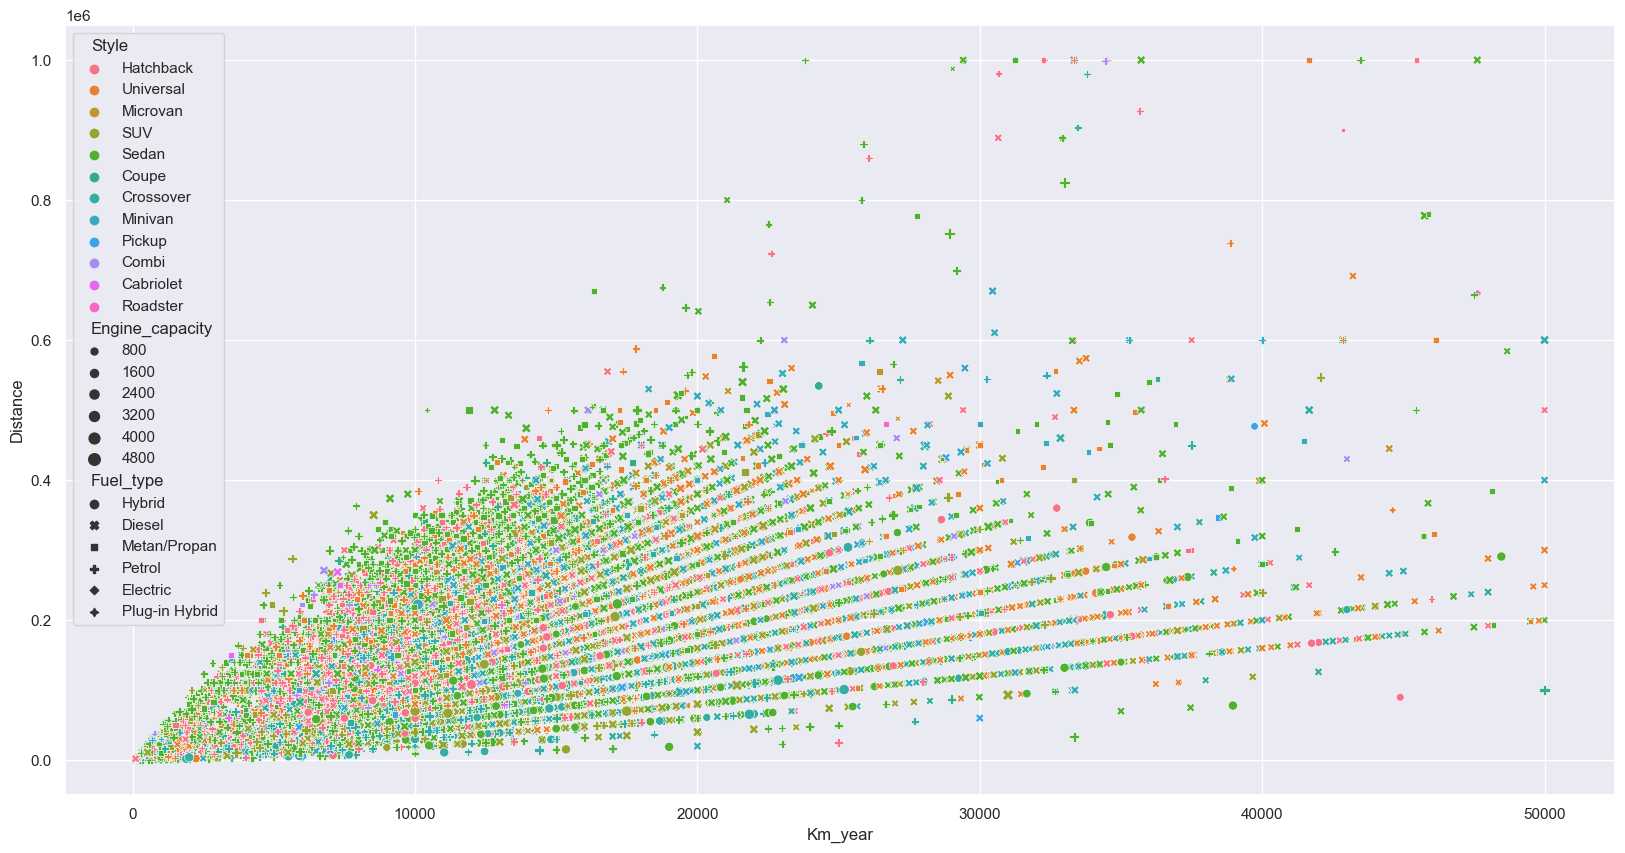

In [17]:
plt.figure(figsize=(20, 10))

sns.scatterplot(
    data=car_df,
    x='Km_year',
    y='Distance',
    hue='Style',
    style='Fuel_type',
    size = 'Engine_capacity'
);

# Добавление новых признаков

#### Добавим поле, дискретизировав значения пробега за год на основе квантилей и выделив соответствующие группы

In [18]:
km_year_labels = ['Небольшой пробег', 'Средний пробег', 'Большой пробег']

car_df['Km_year_quantile'] = pd.qcut(
    car_df['Km_year'],
    q=3,
    labels=km_year_labels
)

#### Добавим поле, объединяющее марку и модель

In [19]:
car_df['Make_model'] = car_df['Make'] + ' ' + car_df['Model']

#### Добавим поле средней стоимости автомобиля в зависимости от марки и модели

In [20]:
car_df['Make_model_mean_price'] = car_df.groupby('Make_model')['Price'].transform('mean')

#### Добавим поле медианной стоимости автомобиля в зависимости от марки и модели

In [21]:
car_df['Make_model_median_price'] = car_df.groupby('Make_model')['Price'].transform('median')

In [22]:
car_df.head(5)

Make         Model  Year      Style  Distance  Engine_capacity  \
0    Toyota         Prius  2011  Hatchback  195000.0           1800.0   
1   Renault  Grand Scenic  2014  Universal  135000.0           1500.0   
2   Renault        Laguna  2012  Universal  110000.0           1500.0   
3      Opel         Astra  2006  Universal  200000.0           1600.0   
4  Mercedes          Vito  2000   Microvan  300000.0           2200.0   

      Fuel_type Transmission   Price  Age       Km_year  Km_year_quantile  \
0        Hybrid    Automatic  7750.0   11  17727.272727    Большой пробег   
1        Diesel       Manual  8550.0    8  16875.000000    Средний пробег   
2        Diesel       Manual  6550.0   10  11000.000000  Небольшой пробег   
3  Metan/Propan       Manual  4100.0   16  12500.000000    Средний пробег   
4        Diesel       Manual  3490.0   22  13636.363636    Средний пробег   

             Make_model  Make_model_mean_price  Make_model_median_price  
0          Toyota Prius            8276.508621                   7900.0  
1  Renault Grand Scenic            7177.654912                   6999.0  
2        Renault Laguna            4598.121951                   5099.0  
3            Opel Astra            4488.550877                   4300.0  
4         Mercedes Vito            8236.543333                   7500.0

#### Найдем количество значений каждой марки и модели автомобиля

In [23]:
car_df_make_counts = car_df['Make_model'].value_counts()

#### Выделим значения марок и моделей автомобилей с количеством менее 25 единиц.

In [24]:
lt = 25
car_df_make_model_lt_25 = car_df_make_counts[car_df_make_counts < lt]

#### Оценим процент числа марок и моделей автомобилей с количеством менее 25 единиц для выделения их в отдельные категории

In [25]:
count_all = car_df.shape[0]
count_lt_25 = car_df_make_model_lt_25.sum()

print(f'Число атомобилей с маркой и моделью меньше {lt} единиц составляет {count_lt_25} штук, {round(count_lt_25 / count_all * 100, 2)} % от общего числа автомобилей')

Число атомобилей с маркой и моделью меньше 25 единиц составляет 4033 штук, 11.36 % от общего числа автомобилей


#### Сделаем замену «редких моделей и марок» в зависомости от средней цены автомобиля. Выделим три ценовых категории: до 5000 евро, от 5000 до 15000 евро и выше 15000 евро.

In [26]:
car_df_rare_high = car_df.loc[(car_df['Make_model'].isin(car_df_make_model_lt_25.index.values)) & (car_df['Make_model_mean_price'] >= 15000)]['Make_model']
car_df_rare_middle = car_df.loc[(car_df['Make_model'].isin(car_df_make_model_lt_25.index.values)) & (car_df['Make_model_mean_price'] >= 5000) & (car_df['Make_model_mean_price'] < 15000)]['Make_model']
car_df_rare_low = car_df.loc[(car_df['Make_model'].isin(car_df_make_model_lt_25.index.values)) & (car_df['Make_model_mean_price'] < 5000)]['Make_model']

In [27]:
car_df['Make_model'] = car_df['Make_model'].replace(car_df_rare_high.values, 'Rare & High')
car_df['Make_model'] = car_df['Make_model'].replace(car_df_rare_middle.values, 'Rare & Middle')
car_df['Make_model'] = car_df['Make_model'].replace(car_df_rare_low.values, 'Rare & Low')

In [28]:
rare_categories = ['Rare & High', 'Rare & Middle', 'Rare & Low']
car_df.loc[car_df['Make_model'].isin(rare_categories)]

Make      Model  Year      Style  Distance  Engine_capacity  \
19                GAZ      31029  1992      Sedan   68000.0           2445.0   
21              Tesla    Model S  2013  Hatchback  113000.0            367.0   
25              Dodge    Caliber  2008  Hatchback  113486.0           1998.0   
31           Mercedes  GLC Coupe  2017  Crossover   71333.0           2500.0   
46            Peugeot       3008  2018  Crossover  132000.0           1500.0   
...               ...        ...   ...        ...       ...              ...   
35465           Skoda    Felicia  1996  Universal  163000.0           1300.0   
35473            Ford  Fiesta 3D  2004  Hatchback  250000.0           1400.0   
35476  Moskvich / Izh     Altele  1993      Combi  222222.0           1500.0   
35482           Volvo       XC70  2005  Universal  321111.0           2500.0   
35495             ARO     Altele  1995      Sedan  180000.0           1500.0   

          Fuel_type Transmission    Price  Age       Km_year  \
19           Petrol       Manual   2222.0   30   2266.666667   
21         Electric    Automatic  27000.0    9  12555.555556   
25     Metan/Propan    Automatic   4495.0   14   8106.142857   
31           Diesel    Automatic  43404.0    5  14266.600000   
46           Diesel    Automatic  16500.0    4  33000.000000   
...             ...          ...      ...  ...           ...   
35465        Petrol       Manual   1666.0   26   6269.230769   
35473        Diesel       Manual   2750.0   18  13888.888889   
35476        Petrol       Manual  40000.0   29   7662.827586   
35482        Petrol    Automatic   5555.0   17  18888.882353   
35495        Diesel       Manual   2000.0   27   6666.666667   

       Km_year_quantile     Make_model  Make_model_mean_price  \
19     Небольшой пробег     Rare & Low            1349.000000   
21       Средний пробег    Rare & High           33475.000000   
25     Небольшой пробег     Rare & Low            4843.705882   
31       Средний пробег    Rare & High           43099.714286   
46       Большой пробег    Rare & High           16041.083333   
...                 ...            ...                    ...   
35465  Небольшой пробег     Rare & Low            1219.545455   
35473    Средний пробег     Rare & Low            2261.111111   
35476  Небольшой пробег  Rare & Middle            6589.900000   
35482    Большой пробег  Rare & Middle           10045.071429   
35495  Небольшой пробег  Rare & Middle            7000.000000   

       Make_model_median_price  
19                       850.0  
21                     33450.0  
25                      5000.0  
31                     43404.0  
46                     16790.0  
...                        ...  
35465                   1100.0  
35473                   2600.0  
35476                   1500.0  
35482                  10249.5  
35495                   7000.0  

[4033 rows x 15 columns]

# Предварительная обработка данных

### Заменим поля с типом object на тип category

In [29]:
category_columns, number_columns = split_column_by_types(car_df)

print(category_columns)
print(number_columns)

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'Km_year_quantile', 'Make_model']
['Year', 'Distance', 'Engine_capacity', 'Price', 'Age', 'Km_year', 'Make_model_mean_price', 'Make_model_median_price']


### Выделим числовые и категориальные столбцы после добавления новых признаков

In [30]:
for column in category_columns:
    car_df[column] = car_df[column].astype('category')

### Нормализация данных

In [31]:
car_df_norm = car_df.copy()

x_min = car_df_norm[number_columns].min()
x_max = car_df_norm[number_columns].max()

car_df_norm[number_columns] = (car_df_norm[number_columns] - x_min) / (x_max - x_min)

In [32]:
car_df_norm.head(5)

Make         Model  Year      Style  Distance  Engine_capacity  \
0    Toyota         Prius  0.80  Hatchback  0.194919         0.333333   
1   Renault  Grand Scenic  0.86  Universal  0.134913         0.270833   
2   Renault        Laguna  0.82  Universal  0.109911         0.270833   
3      Opel         Astra  0.70  Universal  0.199920         0.291667   
4  Mercedes          Vito  0.58   Microvan  0.299930         0.416667   

      Fuel_type Transmission     Price   Age   Km_year  Km_year_quantile  \
0        Hybrid    Automatic  0.075651  0.20  0.353252    Большой пробег   
1        Diesel       Manual  0.083667  0.14  0.336172    Средний пробег   
2        Diesel       Manual  0.063627  0.18  0.218437  Небольшой пробег   
3  Metan/Propan       Manual  0.039078  0.30  0.248497    Средний пробег   
4        Diesel       Manual  0.032966  0.42  0.271270    Средний пробег   

             Make_model  Make_model_mean_price  Make_model_median_price  
0          Toyota Prius               0.087526                 0.084133  
1  Renault Grand Scenic               0.075105                 0.073958  
2        Renault Laguna               0.045947                 0.052501  
3            Opel Astra               0.044709                 0.043478  
4         Mercedes Vito               0.087075                 0.079616

### Стандартизация данных

In [33]:
car_df_scale = car_df.copy()

x_mean = car_df_scale[number_columns].mean()
x_std = car_df_scale[number_columns].std()

car_df_scale[number_columns] = (car_df_scale[number_columns] - x_mean) / x_std

In [34]:
car_df_scale.head(5)

Make         Model      Year      Style  Distance  Engine_capacity  \
0    Toyota         Prius  0.343526  Hatchback  0.149524        -0.107586   
1   Renault  Grand Scenic  0.762388  Universal -0.471297        -0.604550   
2   Renault        Laguna  0.483147  Universal -0.729972        -0.604550   
3      Opel         Astra -0.354577  Universal  0.201259        -0.438895   
4  Mercedes          Vito -1.192300   Microvan  1.235960         0.555033   

      Fuel_type Transmission     Price       Age   Km_year  Km_year_quantile  \
0        Hybrid    Automatic -0.199902 -0.343526  0.366137    Большой пробег   
1        Diesel       Manual -0.115411 -0.762388  0.250124    Средний пробег   
2        Diesel       Manual -0.326639 -0.483147 -0.549593  Небольшой пробег   
3  Metan/Propan       Manual -0.585395  0.354577 -0.345410    Средний пробег   
4        Diesel       Manual -0.649819  1.192300 -0.190726    Средний пробег   

             Make_model  Make_model_mean_price  Make_model_median_price  
0          Toyota Prius              -0.199337                -0.114257  
1  Renault Grand Scenic              -0.359662                -0.250891  
2        Renault Laguna              -0.736019                -0.539019  
3            Opel Astra              -0.752006                -0.660185  
4         Mercedes Vito              -0.205168                -0.174916

### Логарифмирование и стандартизация данных

In [35]:
car_df_log = car_df.copy()

car_df_log[number_columns] = np.log(car_df_log[number_columns])

x_mean = car_df_log[number_columns].mean()
x_std = car_df_log[number_columns].std()

car_df_log[number_columns] = (car_df_log[number_columns] - x_mean) / x_std

In [36]:
car_df_log.head(5)

Make         Model      Year      Style  Distance  Engine_capacity  \
0    Toyota         Prius  0.344519  Hatchback  0.360790         0.059991   
1   Renault  Grand Scenic  0.761849  Universal -0.085802        -0.426522   
2   Renault        Laguna  0.483698  Universal -0.334520        -0.426522   
3      Opel         Astra -0.352417  Universal  0.391538        -0.254305   
4  Mercedes          Vito -1.191036   Microvan  0.883965         0.595467   

      Fuel_type Transmission     Price       Age   Km_year  Km_year_quantile  \
0        Hybrid    Automatic  0.175518 -0.092136  0.457508    Большой пробег   
1        Diesel       Manual  0.284856 -0.648919  0.393061    Средний пробег   
2        Diesel       Manual -0.011715 -0.258776 -0.166688  Небольшой пробег   
3  Metan/Propan       Manual -0.533121  0.562976  0.000520    Средний пробег   
4        Diesel       Manual -0.712405  1.119759  0.114332    Средний пробег   

             Make_model  Make_model_mean_price  Make_model_median_price  
0          Toyota Prius               0.078831                 0.196723  
1  Renault Grand Scenic              -0.142301                 0.020378  
2        Renault Laguna              -0.833609                -0.440850  
3            Opel Astra              -0.871049                -0.689038  
4         Mercedes Vito               0.071317                 0.121057

### Порядковое кодирование

In [37]:
car_df_codes = car_df.copy()

for column in category_columns:
    car_df_codes[column] = car_df_codes[column].cat.codes

In [38]:
car_df_codes.head(5)

Make  Model  Year  Style  Distance  Engine_capacity  Fuel_type  \
0    71    536  2011      4  195000.0           1800.0          2   
1    58    360  2014     11  135000.0           1500.0          0   
2    58    420  2012     11  110000.0           1500.0          0   
3    53    137  2006     11  200000.0           1600.0          3   
4    47    726  2000      5  300000.0           2200.0          0   

   Transmission   Price  Age       Km_year  Km_year_quantile  Make_model  \
0             0  7750.0   11  17727.272727                 2         193   
1             1  8550.0    8  16875.000000                 1         159   
2             1  6550.0   10  11000.000000                 0         162   
3             1  4100.0   16  12500.000000                 1         137   
4             1  3490.0   22  13636.363636                 1         117   

   Make_model_mean_price  Make_model_median_price  
0            8276.508621                   7900.0  
1            7177.654912                   6999.0  
2            4598.121951                   5099.0  
3            4488.550877                   4300.0  
4            8236.543333                   7500.0

### Унитарное кодирование

In [39]:
car_df_ohe = car_df.copy()

car_df_ohe = pd.get_dummies(car_df_ohe)

In [40]:
car_df_ohe.head(5)

Year  Distance  Engine_capacity   Price  Age       Km_year  \
0  2011  195000.0           1800.0  7750.0   11  17727.272727   
1  2014  135000.0           1500.0  8550.0    8  16875.000000   
2  2012  110000.0           1500.0  6550.0   10  11000.000000   
3  2006  200000.0           1600.0  4100.0   16  12500.000000   
4  2000  300000.0           2200.0  3490.0   22  13636.363636   

   Make_model_mean_price  Make_model_median_price  Make_ARO  Make_Abarth  ...  \
0            8276.508621                   7900.0         0            0  ...   
1            7177.654912                   6999.0         0            0  ...   
2            4598.121951                   5099.0         0            0  ...   
3            4488.550877                   4300.0         0            0  ...   
4            8236.543333                   7500.0         0            0  ...   

   Make_model_Volkswagen Tiguan  Make_model_Volkswagen Touareg  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   Make_model_Volkswagen Touran  Make_model_Volkswagen Transporter  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   Make_model_Volkswagen Vento  Make_model_Volvo S60  Make_model_Volvo S80  \
0                            0                     0                     0   
1                            0                     0                     0   
2                            0                     0                     0   
3                            0                     0                     0   
4                            0                     0                     0   

   Make_model_Volvo V60  Make_model_Volvo XC60  Make_model_Volvo XC90  
0                     0                      0                      0  
1                     0                      0                      0  
2                     0                      0                      0  
3                     0                      0                      0  
4                     0                      0                      0  

[5 rows x 1115 columns]

### Сохраняем данные в файлы

In [41]:
car_df.to_csv('data/car_moldova_data.csv', index=False)
car_df_norm.to_csv('data/car_moldova_norm.csv', index=False)
car_df_scale.to_csv('data/car_moldova_scale.csv', index=False)
car_df_log.to_csv('data/car_moldova_log.csv', index=False)
car_df_codes.to_csv('data/car_moldova_codes.csv', index=False)
car_df_ohe.to_csv('data/car_moldova_ohe.csv', index=False)